**Import all Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import Input, Dense, Flatten,Conv2D ,MaxPooling2D ,Dropout
from keras.models import Model, Sequential
from keras import datasets, layers, models
from sklearn import metrics
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt

**Load Dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 13s 0us/step


**Layers for CNN Building**

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same", activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2, strides=(2, 2), padding="same", activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2, padding="same",  dilation_rate=2,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

**Loss Functios and optimizers**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 19s 5ms/step - loss: 1.7891 - accuracy: 0.3375 - val_loss: 1.5159 - val_accuracy: 0.4482
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5095 - accuracy: 0.4505 - val_loss: 1.3426 - val_accuracy: 0.5187
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4231 - accuracy: 0.4863 - val_loss: 1.3008 - val_accuracy: 0.5303
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3573 - accuracy: 0.5122 - val_loss: 1.2773 - val_accuracy: 0.5475
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3130 - accuracy: 0.5262 - val_loss: 1.1883 - val_accuracy: 0.5773
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2717 - accuracy: 0.5419 - val_loss: 1.1633 - val_accuracy: 0.5851
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2457 - accuracy: 0.5500 - val_loss: 1.1513 - val_accuracy: 0.5843
Ep

**Summary of CNN Model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

**Run Epouchs and calcuate Accuracy**

313/313 - 1s - loss: 1.0807 - accuracy: 0.6109 - 649ms/epoch - 2ms/step


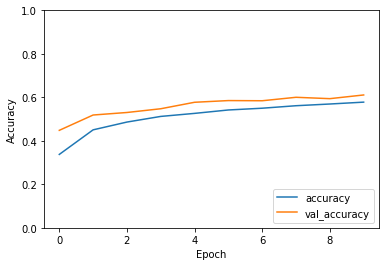

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


**Test and Loss Accuracy**

In [ ]:
print(test_acc)
print(test_loss)

0.6108999848365784
1.08065927028656


**Confusion Matrix**

Precision:  [0.63636364 0.74943567 0.50800427 0.45503792 0.51482702 0.5101626
 0.76949942 0.66332665 0.6756993  0.65445545]
Recall:  [0.665 0.664 0.476 0.42  0.625 0.502 0.661 0.662 0.773 0.661]


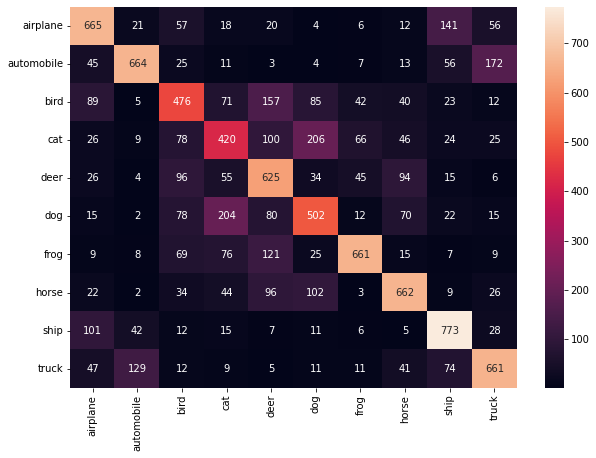

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions  = model.predict(test_images)
predictions_for_cm = predictions.argmax(1)
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
cm = confusion_matrix(test_labels,predictions_for_cm)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print('Precision: ',precision)
print('Recall: ',recall)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names,fmt='d')

In [ ]:
print("Accuracy:",test_acc)
print("Precision:", precision_score(test_labels, predictions_for_cm, average="macro"))
print("Recall:", recall_score(test_labels, predictions_for_cm, average="macro"))

Accuracy: 0.6108999848365784
Precision: 0.6136811928274166
Recall: 0.6109


**Calculate Precision, Recall and F1-score**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_labels,predictions_for_cm))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      1000
           1       0.75      0.66      0.70      1000
           2       0.51      0.48      0.49      1000
           3       0.46      0.42      0.44      1000
           4       0.51      0.62      0.56      1000
           5       0.51      0.50      0.51      1000
           6       0.77      0.66      0.71      1000
           7       0.66      0.66      0.66      1000
           8       0.68      0.77      0.72      1000
           9       0.65      0.66      0.66      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000

